In [79]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# Import GIRK2 data
df = pd.read_csv('raw_girk2.csv')

In [81]:
# Sort the DataFrame based on the 'type' column
df.sort_values(by='type', inplace=True)

# Reset the index after sorting
df.reset_index(drop=True, inplace=True)
df

,sample,type,sex,girk2,bkgr
0,1,2N,M,175.071,252.516
1,3,2N,M,153.290,251.947
2,5,2N,M,168.000,252.013
3,2,Ts,M,133.003,252.392
4,4,Ts,M,134.429,252.103
5,6,Ts,M,102.905,252.277


In [82]:
# Create a new column that subtracts 'girk2' from 'bkgr'
df['difference'] = df['bkgr'] - df['girk2']
df

,sample,type,sex,girk2,bkgr,difference
0,1,2N,M,175.071,252.516,77.445
1,3,2N,M,153.290,251.947,98.657
2,5,2N,M,168.000,252.013,84.013
3,2,Ts,M,133.003,252.392,119.389
4,4,Ts,M,134.429,252.103,117.674
5,6,Ts,M,102.905,252.277,149.372


In [83]:
# Perform a two-sample t-test
type_2N_diff = df[df['type'] == '2N']['difference']
type_Ts_diff = df[df['type'] == 'Ts']['difference']
t_statistic, p_value = ttest_ind(type_2N_diff, type_Ts_diff, equal_var=False)

# Two-tailed two-sample t-test results
print("p-value:", p_value)

p-value: 0.03403263087965526


In [84]:
# Calculate the average values for '2N' and 'Ts' types based on the 'difference' column
avg_male_2n = df[df['type'] == '2N']['difference'].mean()
avg_male_ts = df[df['type'] == 'Ts']['difference'].mean()

# View results
print("Average difference for type 2N:", avg_male_2n)
print("Average difference for type Ts:", avg_male_ts)

Average difference for type 2N: 86.705
Average difference for type Ts: 128.81166666666667


In [85]:
# Calculate the standard deviation of the 'difference' column for each type
stdev_2N = df[df['type'] == '2N']['difference'].std()
stdev_Ts = df[df['type'] == 'Ts']['difference'].std()

# Count the number of samples in each type
n_2N = df[df['type'] == '2N'].shape[0]
n_Ts = df[df['type'] == 'Ts'].shape[0]

# Calculate the Standard Error of the Mean (SEM) for each type
sem_2N = stdev_2N / np.sqrt(n_2N - 1)
sem_Ts = stdev_Ts / np.sqrt(n_Ts - 1)

# View results
print("SEM for type 2N:", sem_2N)
print("SEM for type Ts:", sem_Ts)

SEM for type 2N: 7.678619146695588
SEM for type Ts: 12.605173269997776


In [86]:
# Create a new column 'standardized_values' applying the transformation based on the type
df['standardized_values'] = df.apply(lambda row: (row['difference'] * 100) / avg_male_2n if row['type'] == '2N' else (row['difference'] * 100) / avg_male_ts, axis=1)

# Now you have a new column 'standardized_values' with the standardized values
print(df)

   sample type sex    girk2     bkgr  difference  standardized_values
0       1   2N   M  175.071  252.516      77.445            89.320108
1       3   2N   M  153.290  251.947      98.657           113.784672
2       5   2N   M  168.000  252.013      84.013            96.895219
3       2   Ts   M  133.003  252.392     119.389            92.684928
4       4   Ts   M  134.429  252.103     117.674            91.353526
5       6   Ts   M  102.905  252.277     149.372           115.961546


In [87]:
# Calculating the standardized average and standard deviation for male_2n and male_ts
male_2n_standard_avg = avg_male_2n * 100 / avg_male_2n
male_ts_standard_avg = avg_male_ts * 100 / avg_male_2n
male_2n_standard_std = sem_2N * 100 / avg_male_2n
male_ts_standard_std = sem_Ts * 100 / avg_male_2n

# View results
print("male_2n_standard_avg:", male_2n_standard_avg)
print("male_ts_standard_avg:", male_ts_standard_avg)
print("male_2n_standard_std:", male_2n_standard_std)
print("male_ts_standard_std:", male_ts_standard_std)

male_2n_standard_avg: 100.0
male_ts_standard_avg: 148.56313553620512
male_2n_standard_std: 8.856028079921098
male_ts_standard_std: 14.538000426731765


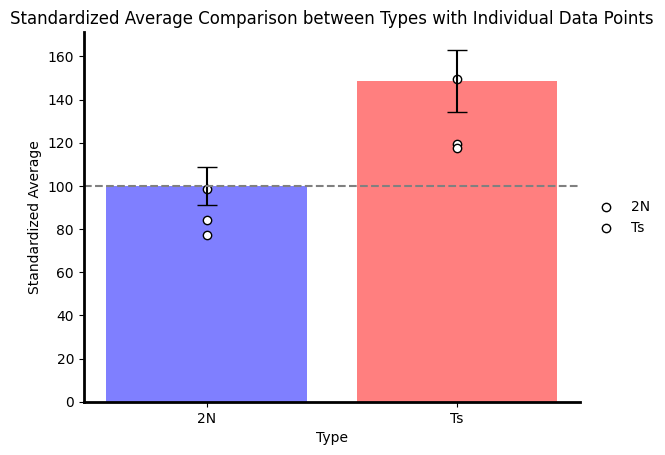

In [88]:
# Define the heights and error bars
heights = [male_2n_standard_avg, male_ts_standard_avg]
errors = [male_2n_standard_std, male_ts_standard_std]

# Define the labels for the bars
labels = ['2N', 'Ts']

# Define the positions for the bars
x_pos = range(len(labels))

# Define colors for bars and points
bar_colors = ['blue', 'red']
point_color = 'black'

# Create the bar graph with error bars
bars = plt.bar(x_pos, heights, yerr=errors, align='center', alpha=0.5, color=bar_colors, capsize=7)

# Add scatter points for individual data points from the 'difference' column
for i, col in enumerate(['2N', 'Ts']):
    x_values = [i] * len(df[df['type'] == col]['difference'])
    y_values = df[df['type'] == col]['difference']
    plt.scatter(x_values, y_values, color=point_color, label=col, facecolor='white')

# Remove top and right borders, make left and bottom borders bold
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Draw a horizontal dashed line at y = 100
plt.axhline(y=100, color='gray', linestyle='--')

# Add labels, title, and legend
plt.xlabel('Type')
plt.ylabel('Standardized Average')
plt.title('Standardized Average Comparison between Types with Individual Data Points')
plt.xticks(x_pos, labels)

# Move the legend to the right outside the graph and make it transparent
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Show the plot
plt.show()

In [89]:
# Import GABABr1 data
df = pd.read_csv('raw_gabbr1.csv')

In [90]:
# Sort the DataFrame by 'receptor' and then by 'type'
sorted_df = df.sort_values(by=['receptor', 'type'])

# Display the sorted DataFrame
sorted_df

,sample,type,sex,receptor,expression_level,bkgr
0,1,2N,M,r1a,198.885,235.294
2,3,2N,M,r1a,184.030,234.438
4,5,2N,M,r1a,198.015,236.779
1,2,Ts,M,r1a,211.837,237.644
3,4,Ts,M,r1a,197.562,235.724
5,6,Ts,M,r1a,207.105,235.623
6,1,2N,M,r1b,121.192,235.294
8,3,2N,M,r1b,69.810,234.438
10,5,2N,M,r1b,122.543,236.779
7,2,Ts,M,r1b,175.735,237.644


In [91]:
# Create a new column that subtracts 'expression_level' from 'bkgr'
sorted_df['difference'] = sorted_df['bkgr'] - sorted_df['expression_level']
sorted_df

,sample,type,sex,receptor,expression_level,bkgr,difference
0,1,2N,M,r1a,198.885,235.294,36.409
2,3,2N,M,r1a,184.030,234.438,50.408
4,5,2N,M,r1a,198.015,236.779,38.764
1,2,Ts,M,r1a,211.837,237.644,25.807
3,4,Ts,M,r1a,197.562,235.724,38.162
5,6,Ts,M,r1a,207.105,235.623,28.518
6,1,2N,M,r1b,121.192,235.294,114.102
8,3,2N,M,r1b,69.810,234.438,164.628
10,5,2N,M,r1b,122.543,236.779,114.236
7,2,Ts,M,r1b,175.735,237.644,61.909


In [92]:
# Calculating averages, standard deviations, and SEMs for each type and receptor
grouped = sorted_df.groupby(['type', 'receptor'])['difference']
avg = grouped.mean()
stdev = grouped.std()
n = grouped.count()
sem = stdev / np.sqrt(n - 1)

# Display calculated statistics
print("Average:")
print(avg)
print("Standard Deviation:")
print(stdev)
print("Standard Error of the Mean:")
print(sem)

Average:
type  receptor
2N    r1a          41.860333
      r1b         130.988667
Ts    r1a          30.829000
      r1b          83.276667
Name: difference, dtype: float64
Standard Deviation:
type  receptor
2N    r1a          7.495563
      r1b         29.132594
Ts    r1a          6.493616
      r1b         25.015314
Name: difference, dtype: float64
Standard Error of the Mean:
type  receptor
2N    r1a          5.300163
      r1b         20.599855
Ts    r1a          4.591680
      r1b         17.688498
Name: difference, dtype: float64


In [93]:
# Assigning each type/receptor pair its own variable
avg_2n_r1a = avg['2N']['r1a']
avg_ts_r1a = avg['Ts']['r1a']
avg_2n_r1b = avg['2N']['r1b']
avg_ts_r1b = avg['Ts']['r1b']

stdev_2n_r1a = stdev['2N']['r1a']
stdev_ts_r1a = stdev['Ts']['r1a']
stdev_2n_r1b = stdev['2N']['r1b']
stdev_ts_r1b = stdev['Ts']['r1b']

sem_2n_r1a = sem['2N']['r1a']
sem_ts_r1a = sem['Ts']['r1a']
sem_2n_r1b = sem['2N']['r1b']
sem_ts_r1b = sem['Ts']['r1b']

# Display calculated statistics
print("Average for 2N/r1a:", avg_2n_r1a)
print("Average for Ts/r1a:", avg_ts_r1a)
print("Average for 2N/r1b:", avg_2n_r1b)
print("Average for Ts/r1b:", avg_ts_r1b)

print("\nStandard Deviation for 2N/r1a:", stdev_2n_r1a)
print("Standard Deviation for Ts/r1a:", stdev_ts_r1a)
print("Standard Deviation for 2N/r1b:", stdev_2n_r1b)
print("Standard Deviation for Ts/r1b:", stdev_ts_r1b)

print("\nSEM for 2N/r1a:", sem_2n_r1a)
print("SEM for Ts/r1a:", sem_ts_r1a)
print("SEM for 2N/r1b:", sem_2n_r1b)
print("SEM for Ts/r1b:", sem_ts_r1b)

Average for 2N/r1a: 41.86033333333334
Average for Ts/r1a: 30.828999999999997
Average for 2N/r1b: 130.98866666666666
Average for Ts/r1b: 83.27666666666666

Standard Deviation for 2N/r1a: 7.495562709585791
Standard Deviation for Ts/r1a: 6.4936158648321465
Standard Deviation for 2N/r1b: 29.13259427742975
Standard Deviation for Ts/r1b: 25.01531411622355

SEM for 2N/r1a: 5.300163220757125
SEM for Ts/r1a: 4.591679812443358
SEM for 2N/r1b: 20.599854967126983
SEM for Ts/r1b: 17.68849824509324


In [94]:
# Standardized values (percentage of mean)
# Uses built-in python methods
standard_avg = avg.groupby(level='type').apply(lambda x: x * 100 / x.mean())
standard_std = stdev.groupby(level='type').apply(lambda x: x * 100 / x.mean())

# Display standardized values
print("Standardized Average:")
print(standard_avg)
print("Standardized Standard Deviation:")
print(standard_std)

Standardized Average:
type  type  receptor
2N    2N    r1a          48.435725
            r1b         151.564275
Ts    Ts    r1a          54.035879
            r1b         145.964121
Name: difference, dtype: float64
Standardized Standard Deviation:
type  type  receptor
2N    2N    r1a          40.927873
            r1b         159.072127
Ts    Ts    r1a          41.217622
            r1b         158.782378
Name: difference, dtype: float64


In [95]:
# Uses Excel methodology
# Calculate mean of 2N and Ts for each type/receptor pair
mean_2n_r1a = sorted_df.loc[(sorted_df['type'] == '2N') & (sorted_df['receptor'] == 'r1a'), 'difference'].mean()
mean_ts_r1a = sorted_df.loc[(sorted_df['type'] == 'Ts') & (sorted_df['receptor'] == 'r1a'), 'difference'].mean()
mean_2n_r1b = sorted_df.loc[(sorted_df['type'] == '2N') & (sorted_df['receptor'] == 'r1b'), 'difference'].mean()
mean_ts_r1b = sorted_df.loc[(sorted_df['type'] == 'Ts') & (sorted_df['receptor'] == 'r1b'), 'difference'].mean()

# Calculate SEM of 2N and Ts for each type/receptor pair
sem_2n_r1a = sorted_df.loc[(sorted_df['type'] == '2N') & (sorted_df['receptor'] == 'r1a'), 'difference'].sem()
sem_ts_r1a = sorted_df.loc[(sorted_df['type'] == 'Ts') & (sorted_df['receptor'] == 'r1a'), 'difference'].sem()
sem_2n_r1b = sorted_df.loc[(sorted_df['type'] == '2N') & (sorted_df['receptor'] == 'r1b'), 'difference'].sem()
sem_ts_r1b = sorted_df.loc[(sorted_df['type'] == 'Ts') & (sorted_df['receptor'] == 'r1b'), 'difference'].sem()

# Calculate standardized average for each type/receptor pair
standardized_avg_2n_r1a = mean_2n_r1a * 100 / mean_2n_r1a
standardized_avg_ts_r1a = mean_ts_r1a * 100 / mean_2n_r1a
standardized_avg_2n_r1b = mean_2n_r1b * 100 / mean_2n_r1b
standardized_avg_ts_r1b = mean_ts_r1b * 100 / mean_2n_r1b

# Calculate standardized SEM for each type/receptor pair
standardized_sem_2n_r1a = sem_2n_r1a * 100 / mean_2n_r1a
standardized_sem_ts_r1a = sem_ts_r1a * 100 / mean_2n_r1a
standardized_sem_2n_r1b = sem_2n_r1b * 100 / mean_2n_r1b
standardized_sem_ts_r1b = sem_ts_r1b * 100 / mean_2n_r1b

# Display results
print("Standardized Average for 2N/r1a:", standardized_avg_2n_r1a)
print("Standardized Average for Ts/r1a:", standardized_avg_ts_r1a)
print("Standardized SEM for 2N/r1a:", standardized_sem_2n_r1a)
print("Standardized SEM for Ts/r1a:", standardized_sem_ts_r1a)
print("Standardized Average for 2N/r1b:", standardized_avg_2n_r1b)
print("Standardized Average for Ts/r1b:", standardized_avg_ts_r1b)
print("Standardized SEM for 2N/r1b:", standardized_sem_2n_r1b)
print("Standardized SEM for Ts/r1b:", standardized_sem_ts_r1b)

Standardized Average for 2N/r1a: 100.0
Standardized Average for Ts/r1a: 73.64728740812701
Standardized SEM for 2N/r1a: 10.338104844141416
Standardized SEM for Ts/r1a: 8.956189712396457
Standardized Average for 2N/r1b: 100.0
Standardized Average for Ts/r1b: 63.57547472300402
Standardized SEM for 2N/r1b: 12.840585049291455
Standardized SEM for Ts/r1b: 11.025838117443785


### Excel Formula:
- **Standardized Average:** Mean of each type * 100 / Mean of 2N
- **Standardized SEM:** SEM of each type * 100 / Mean of 2N

### Python Code:
- **Standardized Average:** Group mean of each type * 100 / Group mean of 2N within each type
- **Standardized SEM:** SEM of each type * 100 / Group mean of 2N within each type

### Differences:
1. **Calculation of Mean:**
   - Excel: Mean is calculated simply as the mean of the entire dataset.
   - Python: Mean is calculated separately for each group (type).

2. **Denominator for Standardization:**
   - Excel: The denominator for standardization (mean of 2N) is calculated using the entire dataset.
   - Python: The denominator for standardization (mean of 2N within each type) is calculated separately for each group (type).

3. **Standardization of SEM:**
   - Excel: SEM is directly scaled by the ratio of means (SEM * 100 / Mean of 2N).
   - Python: SEM is scaled by the ratio of means within each group (SEM * 100 / Mean of 2N within each type).

### Conclusion:
The main difference lies in how the denominator for standardization (mean of 2N) is calculated. Excel uses the mean of 2N calculated from the entire dataset, while Python calculates the mean of 2N separately for each group (type). This difference in denominator calculation leads to discrepancies in the standardized averages and SEMs between your Python analysis and Excel calculations.

Determining which method is correct depends on the context and the specific requirements of your analysis.

1. **Excel Method:**
   - The Excel method calculates standardized averages and SEMs relative to the mean of 2N across the entire dataset.
   - This approach provides a standardized measure based on the entire dataset, allowing for comparison across different groups.

2. **Python Method:**
   - The Python method calculates standardized averages and SEMs relative to the mean of 2N within each group (type).
   - This approach provides a standardized measure within each group, allowing for comparison relative to the baseline within each group.

### Considerations:
- If you want to compare the differences between types relative to a common baseline across the entire dataset, the Excel method might be more suitable.
- If you're interested in understanding the differences within each type relative to its own baseline, the Python method might be more appropriate.

Both methods have their merits, and the choice depends on the specific context and objectives of your analysis. If your intention is to replicate the results obtained in Excel, you should stick to the Excel method. Conversely, if you find the Python method more aligned with your analytical goals, you can rely on the Python calculations.

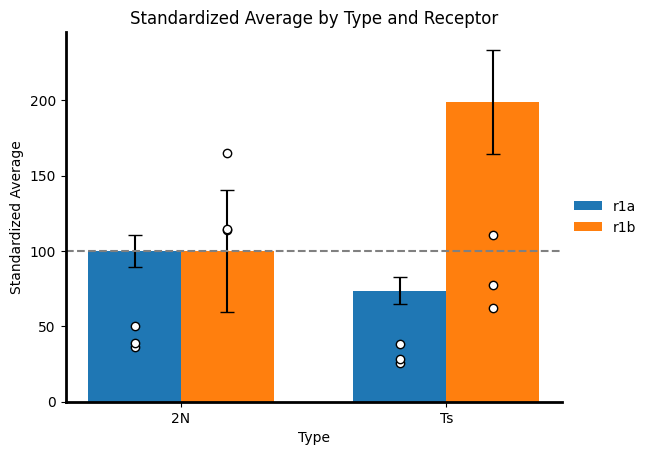

In [96]:
# Data
types = ['2N', 'Ts']
receptors = ['r1a', 'r1b']

# Standardized averages for each type/receptor pair
standardized_averages = {}

# Standardized SEM for each type/receptor pair
standardized_sem = {}

# Plotting
bar_width = 0.35
index = np.arange(len(types))

fig, ax = plt.subplots()
bars = []

# Define colors for the bars
bar_colors = {
    '2N_r1a': ('#1f77b4', '#aec7e8'),  # Dark blue and light blue for 2N r1a
    '2N_r1b': ('#1f77b4', '#aec7e8'),  # Dark blue and light blue for 2N r1b
    'Ts_r1a': ('#d62728', '#ff9896'),  # Dark red and light red for Ts r1a
    'Ts_r1b': ('#d62728', '#ff9896')   # Dark red and light red for Ts r1b
}

for i, receptor in enumerate(receptors):
    for type_val in types:
        # Calculate the variable names dynamically
        variable_name = f"{type_val}_{receptor}"
        
        # Calculate the standardized average for the current type and receptor
        mean_type_receptor = sorted_df.loc[(sorted_df['type'] == type_val) & (sorted_df['receptor'] == receptor), 'difference'].mean()
        standardized_avg_type_receptor = mean_type_receptor * 100 / mean_2n_r1a if type_val == 'Ts' else 100.0
        standardized_averages[variable_name] = standardized_avg_type_receptor
        
        # Calculate the standardized SEM for the current type and receptor
        sem_type_receptor = sorted_df.loc[(sorted_df['type'] == type_val) & (sorted_df['receptor'] == receptor), 'difference'].sem()
        standardized_sem_type_receptor = sem_type_receptor * 100 / mean_2n_r1a if type_val == 'Ts' else sem_type_receptor * 100 / mean_2n_r1a
        standardized_sem[variable_name] = standardized_sem_type_receptor
        
    # Plot the bars with error bars
    bar = ax.bar(index + (i - 0.5) * bar_width, [standardized_averages[f"{type_val}_{receptor}"] for type_val in types], bar_width, 
                 yerr=[standardized_sem[f"{type_val}_{receptor}"] for type_val in types], capsize=5, label=receptor)
    bars.append(bar)

# Plot individual scatterplot points
for type_val in types:
    for receptor in receptors:
        # Filter data for the current type and receptor
        data = sorted_df[(sorted_df['type'] == type_val) & (sorted_df['receptor'] == receptor)]
        # Plot scatterplot points
        ax.scatter(np.full(len(data), index[types.index(type_val)] + (receptors.index(receptor) - 0.5) * bar_width), data['difference'], color='black', zorder=5, facecolor='white')

# Remove top and right borders, make left and bottom borders bold
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)

# Draw a horizontal dashed line at y = 100
plt.axhline(y=100, color='gray', linestyle='--')

# Add labels, title, and legend
ax.set_xlabel('Type')
ax.set_ylabel('Standardized Average')
ax.set_title('Standardized Average by Type and Receptor')
ax.set_xticks(index)
ax.set_xticklabels(types)
ax.legend()

# Move the legend to the right outside the graph and make it transparent
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Show plot
plt.show()
